In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,plot_roc_curve
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
import numpy as np
import dash
%matplotlib inline

from matplotlib import style
style.use('ggplot')

In [184]:
df = pd.read_csv('stroke data.csv')
df['glucose_level'] = pd.cut(df['avg_glucose_level'], bins=[0, 140, float('Inf')], labels=['normal', 'abnormal'])
df = df.drop(columns=['id'])
stroke_data = df.drop(columns=['stroke','bmi'])
target = df.stroke
print(stroke_data.shape)
stroke_data.head()

(5110, 10)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,glucose_level
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,abnormal
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,abnormal
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,normal
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,abnormal
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,abnormal


In [88]:
target.value_counts(normalize=True)*100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

In [59]:
fig = px.bar(list(target.value_counts()), height=350, width=600, text_auto=True,title='How many patients suffred stroke?')
fig.update_layout(bargap = 0.3,showlegend = False,xaxis=dict(title = 'Patients', tickmode='array',tickvals=[0,1],ticktext=['Healthy','Stroke']))
fig.show()


In [60]:
fig = px.bar(list(stroke_data.gender.value_counts()), height=350, width=600, text_auto=True,title='Distribution of Gender')
fig.update_layout(bargap = 0.3,showlegend = False,xaxis=dict(title = 'Gender', tickmode='array',tickvals=[0,1,2],ticktext=['Female','Male','Other']))
fig.show()


In [200]:
fig = px.histogram(df[df['stroke']==1], x='age',color='gender',marginal='box')
fig.show()

In [62]:
fig = px.histogram(df[df['stroke']==1], x='bmi',color='gender',marginal='box')
fig.show()

In [229]:
smoking_status_sample = pd.DataFrame(df.groupby('smoking_status').count()['stroke'])
smoking_status_stroke = pd.DataFrame(df[df['stroke']==1].groupby('smoking_status').count()['stroke'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(values=smoking_status_sample.stroke,labels=smoking_status_sample.index,title='Smoking Status for the sample',domain=dict(x=[0, 0.5])),row=1,col=1)
fig.add_trace(go.Pie(values=smoking_status_stroke.stroke,labels=smoking_status_stroke.index,title='Smoking Status in Stroke Patients',domain=dict(x=[0.5,1])),row=1,col=2)
fig.show()

In [188]:
fig = px.histogram(df,x=df['Residence_type'],color='stroke',text_auto=True)
fig.show()

In [228]:
hyper_tension_sample = pd.DataFrame(df.groupby('hypertension').count()['stroke'])
hyper_tension_stroke = pd.DataFrame(df[df['stroke']==1].groupby('hypertension').count()['stroke'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(values=hyper_tension_sample.stroke,labels=hyper_tension_sample.index,title='Hyper Tension for the sample',domain=dict(x=[0, 0.5])),row=1,col=1)
fig.add_trace(go.Pie(values=hyper_tension_stroke.stroke,labels=hyper_tension_stroke.index,title='Hyper Tension in Stroke Patients',domain=dict(x=[0.5,1])),row=1,col=2)
fig.show()

In [227]:
heart_disease_sample = pd.DataFrame(df.groupby('heart_disease').count()['stroke'])
heart_disease_stroke = pd.DataFrame(df[df['stroke']==1].groupby('heart_disease').count()['stroke'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(values=heart_disease_sample.stroke,labels=heart_disease_sample.index,title='Heart Disease for the sample',domain=dict(x=[0, 0.5])),row=1,col=1)
fig.add_trace(go.Pie(values=heart_disease_stroke.stroke,labels=heart_disease_stroke.index,title='Heart Disease in Stroke Patients',domain=dict(x=[0.5,1])),row=1,col=2)
fig.show()

In [226]:
glucose_sample = pd.DataFrame(df.groupby('glucose_level').count()['stroke'])
glucose_stroke = pd.DataFrame(df[df['stroke']==1].groupby('glucose_level').count()['stroke'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(values=glucose_sample.stroke,labels=glucose_sample.index,title='Glucose for the sample',domain=dict(x=[0, 0.5])),row=1,col=1)
fig.add_trace(go.Pie(values=glucose_stroke.stroke,labels=glucose_stroke.index,title='Glucose in Stroke Patients',domain=dict(x=[0.5,1])),row=1,col=2)
fig.show()

In [225]:
work_sample = pd.DataFrame(df.groupby('work_type').count()['stroke'])
work_stroke = pd.DataFrame(df[df['stroke']==1].groupby('work_type').count()['stroke'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(go.Pie(values=work_sample.stroke,labels=work_sample.index,title='Work Type for the sample',domain=dict(x=[0, 0.5])),row=1,col=1)
fig.add_trace(go.Pie(values=work_stroke.stroke,labels=work_stroke.index,title='Work Type in Stroke Patients',domain=dict(x=[0.5,1])),row=1,col=2)
fig.show()

In [201]:
df[df['stroke']==1].groupby(['gender','ever_married']).count()

age  hypertension  heart_disease  work_type  \
gender ever_married                                                
Female No             21            21             21         21   
       Yes           120           120            120        120   
Male   No              8             8              8          8   
       Yes           100           100            100        100   

                     Residence_type  avg_glucose_level  bmi  smoking_status  \
gender ever_married                                                           
Female No                        21                 21   16              21   
       Yes                      120                120  104             120   
Male   No                         8                  8    7               8   
       Yes                      100                100   82             100   

                     stroke  glucose_level  
gender ever_married                         
Female No                21             21  
       Yes              120            120  
Male   No                 8              8  
       Yes              100            100

In [68]:
fig = px.imshow(df.corr(),text_auto=True,aspect=True,color_continuous_scale='Viridis')
fig.show()

In [69]:
#checking for null values
stroke_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
dtype: int64

### One Hot Encoding

In [112]:
#selecting categorical columns
cat = stroke_data.select_dtypes(exclude='number').columns
print(cat)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [113]:
#one hot encoding
ohe = OneHotEncoder(handle_unknown='ignore')
stroke_data_encoded = pd.DataFrame(ohe.fit_transform(stroke_data[cat]).toarray())
stroke_data_encoded.columns = ohe.get_feature_names_out()

In [114]:
stroke_data = pd.concat([stroke_data_encoded,stroke_data.select_dtypes(include='number')],axis=1)
stroke_data.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67.0,0,1,228.69
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,61.0,0,0,202.21
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,80.0,0,1,105.92
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0,0,0,171.23
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1,0,174.12


In [115]:
column_names = stroke_data.columns

In [116]:
#replacing null values with mean values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
stroke_data = pd.DataFrame(imp_mean.fit_transform(stroke_data),columns=column_names)

In [117]:
stroke_data

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,228.69
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,61.0,0.0,0.0,202.21
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,105.92
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,171.23
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,174.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,80.0,1.0,0.0,83.75
5106,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,125.20
5107,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,82.99
5108,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,166.29


In [118]:
stroke_data.isna().sum()

gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
dtype: int64

In [119]:
smote = SMOTE(random_state=10)
x,y = smote.fit_resample(stroke_data,target)

balanced_stroke_data = pd.DataFrame(x,columns=stroke_data.columns)
balanced_target = pd.Series(y,name='stroke')

In [120]:
#after over sampliing of minority class
b_x_train, b_x_test, b_y_train, b_y_test = train_test_split(balanced_stroke_data,balanced_target,test_size=0.3)


In [121]:
#before oversampling minority class
x_train, x_test, y_train, y_test = train_test_split(stroke_data,target,test_size=0.3)


In [125]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))



0.908675799086758
[[1378   73]
 [  67   15]]


In [130]:
clf = DecisionTreeClassifier()
clf.fit(b_x_train,b_y_train)
pred = clf.predict(b_x_test)
print(accuracy_score(b_y_test,pred))
print(confusion_matrix(b_y_test,pred))

0.9475488515598217
[[1407   80]
 [  73 1357]]


In [98]:
rf_param_grid = {
    'n_estimators' : np.arange(10,200,10),
    'max_depth': np.arange(3,10,1),
}

In [99]:
rscv = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=rf_param_grid,cv=10,verbose=False)
rscv.fit(b_x_train,b_y_train)
best=rscv.best_params_
print(best)

{'n_estimators': 110, 'max_depth': 9}


In [134]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.9458577951728636
[[1449    2]
 [  81    1]]


Accuracy: 
 0.9674322934521769
Confusion Matrix:
 [[1478    9]
 [  86 1344]]
Cross Validation: 
 [0.95107632 0.94911937 0.95107632 0.95107632 0.94911937 0.95303327
 0.95303327 0.95107632 0.95303327 0.95107632]
Mean cross validation score:
 0.9512720156555773
classfication report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1487
           1       0.99      0.94      0.97      1430

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



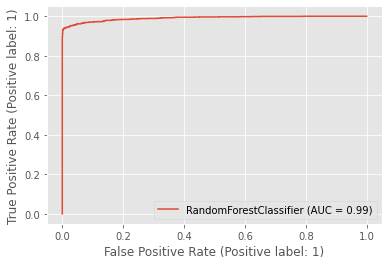

In [139]:
clf = RandomForestClassifier(**best)
clf.fit(b_x_train,b_y_train)
pred = clf.predict(b_x_test)
print('Accuracy: \n',accuracy_score(b_y_test,pred))
print("Confusion Matrix:\n",confusion_matrix(b_y_test,pred))
cross_score = cross_val_score(clf,stroke_data,target,cv=10)
print('Cross Validation: \n', cross_score)
print("Mean cross validation score:\n",cross_score.mean())
print("classfication report: \n",classification_report(b_y_test,pred))
plot_roc_curve(clf, b_x_test,b_y_test)


In [154]:
clf = GradientBoostingClassifier()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))



0.9465101108936725
[[1446   12]
 [  70    5]]


In [ ]:
clf = GradientBoostingClassifier()
clf.fit(b_x_train,b_y_train)
pred = clf.predict(b_x_test)
print(accuracy_score(b_y_test,pred))
print(confusion_matrix(b_y_test,pred))



0.9622900239972575
[[1452   13]
 [  97 1355]]


In [162]:
clf = GaussianNB()
clf.fit(b_x_train,b_y_train)
pred = clf.predict(b_x_test)
print(accuracy_score(b_y_test,pred))
print(confusion_matrix(b_y_test,pred))



0.7936235858758999
[[ 945  520]
 [  82 1370]]


In [165]:
clf = GaussianNB()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))



0.9093281148075668
[[1377   81]
 [  58   17]]
